# Lab1: Simple Connectionist Models of Language
#### Lab design and questions: Jennifer Spenader 2019/2020, Python code version: Wietse de Vries, 2019
#### Revised by: Jacqueline van Arkel, Sohyung Kim, Giorgos Tziafas, 2020

#### Varun Ravi Varma (S3893030), *worked with Magdalena Bilska (S4086511)*

## Learning Goals for this lab:

* Get used to use the Keras deep learning framework
* Build simple feed-forward connectionist networks
* Understand the usefulness of hidden layers
* Understand the features of simple recurrent networks (SRNs)
* Build a simple recurrent network by using Keras that performs the sameas Elman (1990)
* Carry out a follow-up experiment with the Elman (1990) network
* Answer questions related to Elman (1990)
* All lab reports should be handed in individually. However, most questions can be compeleted in pairs if desired. The exception is Exercise 6 at the end of the lab. Exercise 6 should be answered individually. If you work together, please clearly identify who you worked with in your homework. Also, please add your name and student number to the first page of the homework.

Note: only questions next to capital letters in `Exercise` sections need to be included in the report. Other questions are rhetorical.

# Part 1: Learning boolean operators using a feed-forward neural networks

In this section, you will learn how to create a simple feed-forward neural network in Python by using [Keras](https://keras.io/). Feed-forward neural networks are one of the simplest types, because all information is passed on in one direction (forward!), with no information being 'looped' back into the netwokr. 

Keras is a high-level neural network API that runs on top of lower level neural network libraries like Tensorflow or Theano. Since the Tensorflow 2.0 official release, Keras is integrated as a back-end to the Tensorflow framework. Keras will let use easily build neural networks by simply defining what their design architecture should be. 

Before we get started, make sure you have installed Keras with a backend of your choice. Follow the [official instructions](https://keras.io/#installation) by Keras or get started quickly by running the following commands:

```
pip3 install tensorflow
pip3 install keras
```

This is all you need to do to get started creating your first neural network! Now we are ready to create your first neural network that simulates the boolean AND operator.

## Model definition

To set up our neural network, e.g. define our 'model', we have to import some modules from Keras:

In [39]:
seed_value = 0
# Set the global pythonhashseed variable to zero for reproducibility
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Setting the tensorflow seed
import tensorflow as tf
tf.random.set_seed(seed_value)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Now we want to create very simple perceptron model that has two binary input nodes (that accept `0`'s or `1`'s), and a single binary output node that outputs a  `1` if and only if both inputs were `1`, and otherwise will output a `0`. (Can you already guess what this network is?)

In Keras, we can create a simple feed-forward neural network by creating what's termed a  [`Sequential`](https://keras.io/models/sequential/) model. Within a `Sequential` model, an arbitrary number of layers can be defined. The last layer is the output layer and any preceding layers are hidden layers. The first layer in the model requires information about the input shape, i.e. how many nodes are 'sending through' input. Note that the input layer is not explicitly defined as a layer in a `Sequential` Keras model.

The model can be defined the following way:

In [41]:
model = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


        This command will create a feed-forward network (a `model`) that contains a single layer with one node (one unit). The [`Dense`](https://keras.io/layers/core/) layer type means that this is a type of basic neural network layer in which all units are connected to all units in the previous layer. Inside the `Dense` expression we also say how many input layers there are with the input_dim=2 information. For this network we have also used the `tanh` [activation function](https://keras.io/activations/).  Note also that by default, every unit in a dense layer also has a bias, so this does not need to be explicitly defined. 
After defining the model, it has be be compiled, i.e. it has to be run, in a process where the weights will be modified depending on how well the network dos in predicting the output given some input. 

In [42]:
model.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

In compiling, the model will try to minimize error, also known as `loss`. We use the mean squared error [loss](https://keras.io/losses/) function to cacluate loss with the stochastic gradient descent [optimizer](https://keras.io/optimizers/). (It is a good idea to read a bit about this and familiarize yourself with these terms). The learning rate and momentum often have to be chosen by trial an error. Frequently, getting the fastest or most accurate performance are considerations, but for our purposes, how realistic they are for simulating human learning might be a consideration. The `compile` method also allows definition of [metrics](https://keras.io/metrics/), i.e. ways in which you can evaluate the quality of the results. This does not influence training, but just gives us some nice information to analyze (and hopefully graph!).

## Training

Before we start training however, we need some training data. Python machine learning conventions are that input data is defined as an `X` variable and the corresponding target output as `y`. Recall that our model has only two input nodes, so this means the only possibilities (since these are binary input nodes) is one of four possible combinations of `0`s and `1`s. See below. So we will need two-dimensional input values and are trying to learn to predict the one-dimensional output given in `y` such athat only when both input values are `1` do we output `1`.  

In [43]:
import numpy as np

In [44]:
X_and = np.array([(0,0), (1,0), (0,1), (1,1)])
y_and = np.array([0, 0, 0, 1])

Now we can train our model. We'll store the training in `history`. We'll train for 15 epochs, which means that we'll run the entire training set (shuffled) trhough the network, each time revising the weights based on the difference between our output and `y`, 15 times. We would also like to know what is going on as it's running, so we'll ask for some intermittend output information (e.g. `verbose=2`).

In [45]:
history = model.fit(X_and, y_and, epochs=15, shuffle=True, verbose=2)

Train on 4 samples
Epoch 1/15
4/4 - 0s - loss: 1.0780 - accuracy: 0.7500
Epoch 2/15
4/4 - 0s - loss: 0.8720 - accuracy: 0.7500
Epoch 3/15
4/4 - 0s - loss: 0.4268 - accuracy: 0.7500
Epoch 4/15
4/4 - 0s - loss: 0.3691 - accuracy: 0.2500
Epoch 5/15
4/4 - 0s - loss: 0.4877 - accuracy: 0.2500
Epoch 6/15
4/4 - 0s - loss: 0.5161 - accuracy: 0.2500
Epoch 7/15
4/4 - 0s - loss: 0.4879 - accuracy: 0.2500
Epoch 8/15
4/4 - 0s - loss: 0.4052 - accuracy: 0.2500
Epoch 9/15
4/4 - 0s - loss: 0.2576 - accuracy: 0.5000
Epoch 10/15
4/4 - 0s - loss: 0.0980 - accuracy: 1.0000
Epoch 11/15
4/4 - 0s - loss: 0.1447 - accuracy: 0.7500
Epoch 12/15
4/4 - 0s - loss: 0.2194 - accuracy: 0.7500
Epoch 13/15
4/4 - 0s - loss: 0.1158 - accuracy: 1.0000
Epoch 14/15
4/4 - 0s - loss: 0.1037 - accuracy: 1.0000
Epoch 15/15
4/4 - 0s - loss: 0.1409 - accuracy: 1.0000


Well, an accuracy of `1.0` seems good. Lets look at our training process:

In [46]:
import matplotlib.pyplot as plt

With the below code snippet, you can visualise the loss and the accuracy progression of your trained model through the `'loss'` and `'acc'` keys of the dictionary object `history.history`: 

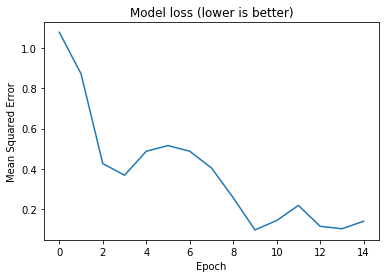

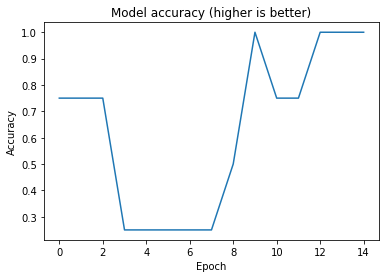

In [47]:
plt.plot(history.history['loss'])
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Note that the loss decreases nicely, but it is not yet completely zero. For deterministic problems like a simple AND operation this would be possible but in real world scenario's having a zero loss is often impossible.

## Exercise 1

 A) Draw the architecture diagram of the neural network with circles and arrows. How many nodes does the model have (incl. bias)?. 
 
 ![](model_plot.png)
 The model has 4 nodes (2 input nodes, 1 bias node and 1 output node).
 

 
 B)What is the formula that describes the output `y'` with respect to the inputs `(x1,x2)` (Hint: use w1 and w2 for weights)?
 
\begin{equation*}
y' = tanh(w_{1} * x_{1} + w_{2} * x_{2} + w_{b} * b)
\end{equation*}


 
 C) What is the loss function used for training this model? Provide it's formula for model predictions `y'` and target outputs `y`.
 
The mean squared error is used for training this model. The formula is as follows:
\begin{equation*}
MSE = \frac{1}{n}{\sum_{i=0}^{n}(y_{i}-y'_{i})^{2}}
\end{equation*}
where $n$ is the number of samples.

## Network analysis

To see what the network learned, we can visualize the model weights using a special function that is defined in `plot_functions.py`. This will show us the network with its weights, showing positive weights in red, and negative weights in blue. 

In [48]:
from plot_functions import plot_weight_matrix, plot_activation_matrix

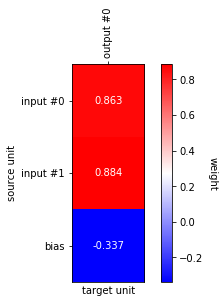

In [49]:
plot_weight_matrix(model)

Now we see that the output is only above 0.5 if both input values are 1. Let's see what the exact outputs are for our four possible inputs:

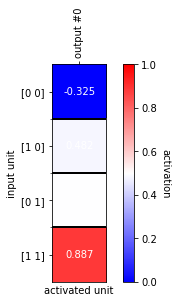

In [50]:
plot_activation_matrix(model, X_and, vmin=0, vmax=1)

## Exercise 2

 A) Re-run the model, but this time only run 4 or 5 Epochs (so that you don't get 1.00 accuracy). Then plot the weight matrix for the model. Multiply the inputs by the weights to get the output. Explain how the model works and why it doesn't get everything correct. 

Train on 4 samples
Epoch 1/5
4/4 - 0s - loss: 0.7218 - accuracy: 0.7500
Epoch 2/5
4/4 - 0s - loss: 0.3861 - accuracy: 0.7500
Epoch 3/5
4/4 - 0s - loss: 0.2399 - accuracy: 0.7500
Epoch 4/5
4/4 - 0s - loss: 0.3446 - accuracy: 0.2500
Epoch 5/5
4/4 - 0s - loss: 0.3604 - accuracy: 0.5000


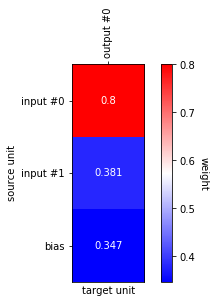

In [51]:
# Initializing a new model, since the old model still uses the weights from previous training session
model_2 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])
model_2.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])
# Training the new model for 5 epochs
model_2.fit(X_and, y_and, epochs=5, shuffle=True, verbose=2)
plot_weight_matrix(model_2)

The output computed by the neural network can be computed using the following equation:
\begin{equation*}
\begin{aligned}
y' =& tanh(w_{1} * x_{1}+w_{2} * x_{2}+w_{b} * b)\\
=& tanh(0.8 * x_{1}+0.381 * x_{2}+0.347)
\end{aligned}
\end{equation*}

Tabulating the output $ y' $ that is calculated by the model:

| $ x_{1} $ | $ x_{2} $ | $ y' $ |
|-----------|-----------|--------|
|     0     |     0     |  0.334 |
|     1     |     0     |  0.817 |
|     0     |     1     |  0.622 |
|     1     |     1     |  0.910 |


The model is optimized with SGD with momentum, with a high learning rate of $0.3$ and a Nesterov momentum value of $0.8$. This could enable the model to skip over local minima over multiple epochs of training, but over smaller epochs, we see that the model fails to compute the optimal weights. This could be due to the fact that there is increased noise in the update of weights due to hugh values of momentum over the 5 epochs of training.
Since the weights are not optimised, the model is unable to classify some inputs correctly (in this case the input $[1, 0]$ returns an output of $1$).

 B) Now that you know how to define and train a simple model, try to model the inclusive OR operator instead of AND using the same model. You don't have to change the model architecture: simply create a new training data and your own training data (X) and target output (y) for inclusive OR.
 

In [52]:

X_or = np.array([(0,0), (1,0), (0,1), (1,1)])
y_or = np.array([0, 1, 1, 1])
# Initializing a new model, since the old model still uses the weights from previous training session
model_3 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])
model_3.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])
# Fitting the model on OR data
run_or = model_3.fit(X_or, y_or, epochs=30, shuffle=True, verbose=2)

Train on 4 samples
Epoch 1/30
4/4 - 0s - loss: 1.1106 - accuracy: 0.5000
Epoch 2/30
4/4 - 0s - loss: 0.4447 - accuracy: 0.7500
Epoch 3/30
4/4 - 0s - loss: 0.1506 - accuracy: 0.7500
Epoch 4/30
4/4 - 0s - loss: 0.1684 - accuracy: 0.7500
Epoch 5/30
4/4 - 0s - loss: 0.1940 - accuracy: 0.7500
Epoch 6/30
4/4 - 0s - loss: 0.2078 - accuracy: 0.7500
Epoch 7/30
4/4 - 0s - loss: 0.2153 - accuracy: 0.7500
Epoch 8/30
4/4 - 0s - loss: 0.2192 - accuracy: 0.7500
Epoch 9/30
4/4 - 0s - loss: 0.2212 - accuracy: 0.7500
Epoch 10/30
4/4 - 0s - loss: 0.2218 - accuracy: 0.7500
Epoch 11/30
4/4 - 0s - loss: 0.2215 - accuracy: 0.7500
Epoch 12/30
4/4 - 0s - loss: 0.2203 - accuracy: 0.7500
Epoch 13/30
4/4 - 0s - loss: 0.2184 - accuracy: 0.7500
Epoch 14/30
4/4 - 0s - loss: 0.2156 - accuracy: 0.7500
Epoch 15/30
4/4 - 0s - loss: 0.2119 - accuracy: 0.7500
Epoch 16/30
4/4 - 0s - loss: 0.2071 - accuracy: 0.7500
Epoch 17/30
4/4 - 0s - loss: 0.2009 - accuracy: 0.7500
Epoch 18/30
4/4 - 0s - loss: 0.1927 - accuracy: 0.7500


 C) What is the resulting loss compared to the AND implementation? Plot the loss and accuracy and include these plots in your answer. Is the model able to deal correctly with inclusive OR ? How does the model work? Explain your answer by referring to the weights learned. 
 

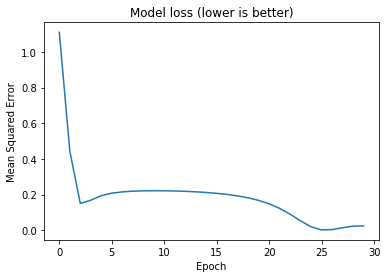

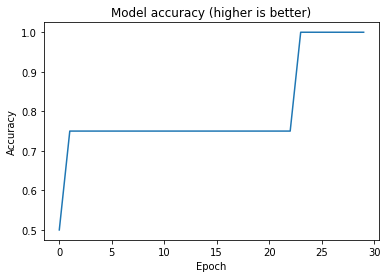

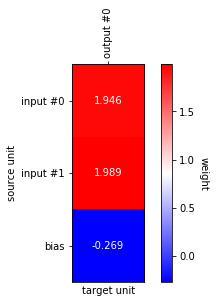

In [53]:
plt.plot(run_or.history['loss'])
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(run_or.history['accuracy'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plot_weight_matrix(model_3)

The model takes longer to learn the OR function as compared to the AND function. At $15$ epochs the model is only able to learn to represent $3$ out of $4$ inputs to correct outputs. The weights from training on the OR data are significantly different as compared to the weights for the AND data. Classification is learnt as a representation in a vector space, based on the inputs and labels given to the model. This is reflected in the higher weights of the OR model as compared to the AND model. The outputs from training on the OR data are as follows:

\begin{equation*}
\begin{aligned}
y' = tanh(1.946 * x_{1}+1.989 * x_{2} - 0.269 * b)
\end{aligned}
\end{equation*}

| $ x_{1} $ | $ x_{2} $ | $ y' $ |
|-----------|-----------|--------|
|     0     |     0     | -0.263 |
|     1     |     0     |  0.932 |
|     0     |     1     |  0.938 |
|     1     |     1     |  0.999 |

Thus the model learns to represent the OR function over longer training epochs.

 D) Try to do the same for the exclusive OR (XOR) operator. Create training and target data and use the same model to train. What do you notice? Explain what problems you encounter and why.
 

Train on 4 samples
Epoch 1/15
4/4 - 0s - loss: 1.4863 - accuracy: 0.5000
Epoch 2/15
4/4 - 0s - loss: 0.8791 - accuracy: 0.5000
Epoch 3/15
4/4 - 0s - loss: 0.2820 - accuracy: 0.5000
Epoch 4/15
4/4 - 0s - loss: 0.4078 - accuracy: 0.5000
Epoch 5/15
4/4 - 0s - loss: 0.4577 - accuracy: 0.5000
Epoch 6/15
4/4 - 0s - loss: 0.4754 - accuracy: 0.5000
Epoch 7/15
4/4 - 0s - loss: 0.4832 - accuracy: 0.5000
Epoch 8/15
4/4 - 0s - loss: 0.4872 - accuracy: 0.5000
Epoch 9/15
4/4 - 0s - loss: 0.4895 - accuracy: 0.5000
Epoch 10/15
4/4 - 0s - loss: 0.4909 - accuracy: 0.5000
Epoch 11/15
4/4 - 0s - loss: 0.4918 - accuracy: 0.5000
Epoch 12/15
4/4 - 0s - loss: 0.4924 - accuracy: 0.5000
Epoch 13/15
4/4 - 0s - loss: 0.4927 - accuracy: 0.5000
Epoch 14/15
4/4 - 0s - loss: 0.4929 - accuracy: 0.5000
Epoch 15/15
4/4 - 0s - loss: 0.4931 - accuracy: 0.5000


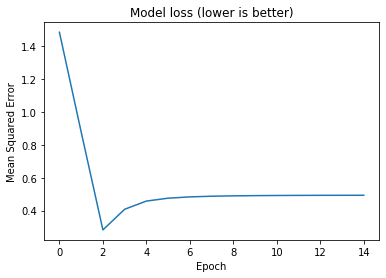

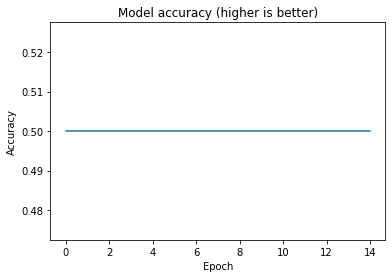

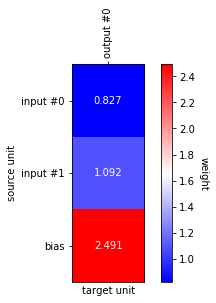

In [54]:
X_xor = np.array([(0,0), (1,0), (0,1), (1,1)])
y_xor = np.array([0, 1, 1, 0])

# Initializing a new model, since the old model still uses the weights from previous training session
model_4 = Sequential([
    Dense(1, input_dim=2, activation='tanh', name='output')
])
model_4.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

run_xor = model_4.fit(X_xor, y_xor, epochs=15, shuffle=True, verbose=2)

plt.plot(run_xor.history['loss'])
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(run_xor.history['accuracy'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plot_weight_matrix(model_4)

The equation generated from training on the XOR data are as follows:

\begin{equation*}
\begin{aligned}
y' = tanh(0.827 * x_{1}+1.092 * x_{2} +2.491)
\end{aligned}
\end{equation*}


| $ x_{1} $ | $ x_{2} $ | $ y' $ |
|-----------|-----------|--------|
|     0     |     0     |  0.986 |
|     1     |     0     |  0.997 |
|     0     |     1     |  0.998 |
|     1     |     1     |  1.000 |

The network misrepresents $[0, 0]$ and $[1, 1]$ since it is not able to identify an accurate hyperplane for the given dataset. The number of training epochs would not matter as the network would only learn to accurately represent $2$ of the $4$ data points. The bias is significntly larger compared to the networks that learned AND and OR functions.

 E) Create a new network model that does solve the XOR problem. You can do this by adding an additional `Dense` layer with two units to the network. Note: to do this, the `input_dim` parameter will need to be moved to the first layer.
 

In [55]:
xor_model = Sequential()
xor_model.add(Dense(2, input_dim=2, activation='tanh', name='hidden1'))
xor_model.add(Dense(1, activation='tanh', name='output'))
xor_model.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.3, momentum=0.8),
              metrics=['accuracy'])

xor_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 2)                 6         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


 F) How successful is this new model? Also, how does your network solve the problem? Look at the weight matrix of your trained model, include it in your report with a short paragraph describing in words how the model works.

Train on 4 samples
Epoch 1/100
4/4 - 0s - loss: 0.4619 - accuracy: 0.5000
Epoch 2/100
4/4 - 0s - loss: 0.2535 - accuracy: 0.5000
Epoch 3/100
4/4 - 0s - loss: 0.2691 - accuracy: 0.5000
Epoch 4/100
4/4 - 0s - loss: 0.3132 - accuracy: 0.5000
Epoch 5/100
4/4 - 0s - loss: 0.3282 - accuracy: 0.5000
Epoch 6/100
4/4 - 0s - loss: 0.3184 - accuracy: 0.5000
Epoch 7/100
4/4 - 0s - loss: 0.2901 - accuracy: 0.5000
Epoch 8/100
4/4 - 0s - loss: 0.2549 - accuracy: 0.7500
Epoch 9/100
4/4 - 0s - loss: 0.2358 - accuracy: 0.5000
Epoch 10/100
4/4 - 0s - loss: 0.2407 - accuracy: 0.5000
Epoch 11/100
4/4 - 0s - loss: 0.2385 - accuracy: 0.2500
Epoch 12/100
4/4 - 0s - loss: 0.2168 - accuracy: 0.5000
Epoch 13/100
4/4 - 0s - loss: 0.2018 - accuracy: 0.7500
Epoch 14/100
4/4 - 0s - loss: 0.1999 - accuracy: 0.7500
Epoch 15/100
4/4 - 0s - loss: 0.1980 - accuracy: 0.7500
Epoch 16/100
4/4 - 0s - loss: 0.1903 - accuracy: 0.7500
Epoch 17/100
4/4 - 0s - loss: 0.1813 - accuracy: 0.5000
Epoch 18/100
4/4 - 0s - loss: 0.1768 -

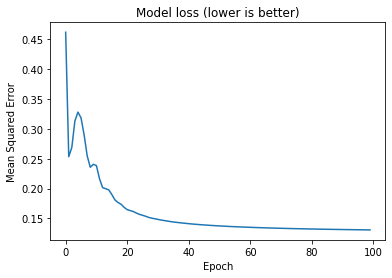

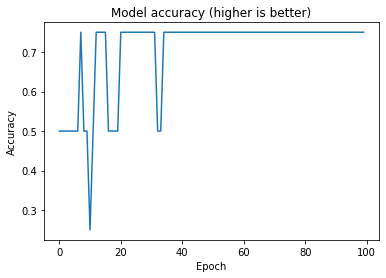

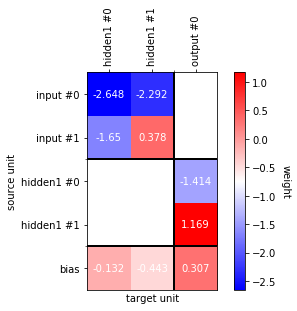

In [56]:
run_xor2 = xor_model.fit(X_xor, y_xor, epochs=100, shuffle=True, verbose=2)
plt.plot(run_xor2.history['loss'])
plt.title('Model loss (lower is better)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(run_xor2.history['accuracy'])
plt.title('Model accuracy (higher is better)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plot_weight_matrix(xor_model)

The model trains for $100$ epochs and reaches a training accuracy of $75\%$. 
Over more epochs, the model could learn to represent the complete XOR function.

The model can be defined using the following formula:

\begin{equation*}
\begin{aligned}
y' = tanh( -1.414 * tanh(-2.648 * x_{1} - 1.65 * x_{2} - 0.132 * b_{1}) + 1.169 * tanh(-2.292 * x_{1} + 0.378 * x_{2} - 0.443 * b_{2}) + 0.307 * b)
\end{aligned}
\end{equation*}

---
---
---

# Part 2: Modelling Sequential XOR with Simple Recurrent Neural Networks

If you have completed the previous exercise, you have solved the XOR problem using a feed-forward neural network in Keras. But feed-forwad networks do not have any way to keep track of sequences of words in time, that may depend on each other. But language use does rely on information about the previous word for interpreting the next. To be able to include this kind of temporal/memory information in a simple network, we need to use something more complex than a feed forward model.  In this section,  we will create our first simple recurrent neural network. This network is a reproduction of the sequential XOR network by Elman (1990).

The input for our network will be a single 3,000-bit which is created by concatenating 1,000 random XOR sequences. Every first and second bit is random and the third bit is the XOR of the first two values. The network tries to predict the next bit in the sequence. For this, the network needs to remember information about previous inputs since that is the only way how every third input can be predicted correctly.

_Elman, J. L. (1990). Finding structure in time. Cognitive science, 14(2), 179-211._

In [57]:
np.random.seed(1990)  # Use random seed for reproducability

## Model definition

Let's define a very simple network that has a single input and output unit. But we'll add more complexity by adding an additional dimension: memory for the output weights of the previous input, i.e. we'll keep some information about the step before the data we are analyzing. This will be accomplished by using what's called a `Time Distributed` unit, which will give us the memory we need. First, import necessary `keras` packages:

In [58]:
from tensorflow.keras.layers import SimpleRNN, TimeDistributed
from tensorflow.keras.initializers import Constant

In [59]:
model_rnn1 = Sequential([
    SimpleRNN(2, input_shape=(3000, 1),
              return_sequences=True,
              activation='tanh',
              recurrent_initializer=Constant(0.5),
              name='hidden'),
    TimeDistributed(Dense(1, activation='sigmoid', name='output'))
])

model_rnn1.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=0.4, momentum=0.9),
              metrics=['binary_accuracy'])

In the model above, we define a simple recurrent neural network with [`SimpleRNN`](https://keras.io/layers/recurrent/#simplernn) with 2 units in the recurrent hidden layer. Its input shape is `(3000, 1)` which corresponds to 3000 time steps with 1 dimension each. The `return_sequences=True` argument makes sure that activation is passed on to the next layer for every time step instead of only the final time step activation. We want that the network makes a seperate prediction for every time step, so the output layer is wrapped inside of `TimeDistributed`. This wrapper makes it possible to backpropagate for every time step consequtively instead of optimizing the complete sequence at once.

## Training

Now we can create our training data. This is a concatenation of 1000 random XOR problems.

In [60]:
np.random.seed(10)
xor_data = np.array([(0,0,0), (0,1,1), (1,0,1), (1,1,0)])
xor_sequence = np.ravel(xor_data[np.random.randint(4, size=1001)])
print(xor_sequence)
X = xor_sequence[np.newaxis, :-3, np.newaxis]
y = xor_sequence[np.newaxis, 1:-2, np.newaxis]
X.shape, y.shape

[0 1 1 ... 1 1 0]


((1, 3000, 1), (1, 3000, 1))

The X and y shapes must be `(input_size, timesteps, input_dim)`. We only train a single sequence, it has 3000 time steps and it has 1 dimension.

Lets's look at how well the network can learn our training data:

In [61]:
history = model_rnn1.fit(X, y, epochs=300, verbose=1)

Train on 1 samples
Epoch 1/300
1/1 [==============================] - 1s 1s/sample - loss: 0.3454 - binary_accuracy: 0.5003
Epoch 2/300
1/1 [==============================] - 1s 777ms/sample - loss: 0.3352 - binary_accuracy: 0.5007
Epoch 3/300
1/1 [==============================] - 1s 760ms/sample - loss: 0.3170 - binary_accuracy: 0.5013
Epoch 4/300
1/1 [==============================] - 1s 686ms/sample - loss: 0.2953 - binary_accuracy: 0.4807
Epoch 5/300
1/1 [==============================] - 1s 793ms/sample - loss: 0.2759 - binary_accuracy: 0.4643
Epoch 6/300
1/1 [==============================] - 1s 683ms/sample - loss: 0.2639 - binary_accuracy: 0.4520
Epoch 7/300
1/1 [==============================] - 1s 668ms/sample - loss: 0.2612 - binary_accuracy: 0.5320
Epoch 8/300
1/1 [==============================] - 1s 764ms/sample - loss: 0.2651 - binary_accuracy: 0.4997
Epoch 9/300
1/1 [==============================] - 1s 812ms/sample - loss: 0.2711 - binary_accuracy: 0.4997
Epoch 10/300

Plot the loss and accuracy progression of the model's training by using  the `loss` and `binary_accuracy` keys of dictionary `history.history` like before. What is the final accuracy of the model?

## Exercise 3

 A) Draw the architecture diagram of the SRN that solves the XOR problem. You can represent connections from one layer to another by a single arrow.

![](srn_plot.png)

 B) It turns out that the accuracy will not get higher than 0.66. Why specifically this number (HINT: What is theoretically possible? You can see for yourself by writing out some data and trying to guess yourself what the next input will be.) Explain your answer.

Let us consider 3 separate sets of inputs in a single sequence. WHen the model is fed input 1, it returns a blind prediction with a probability of the answer being correct = $0.5$. The probability for the second trial with the second sequence of inputs is also $0.5$. With the third trial, the chances are improved based on the knowledge of the previous trials taht the model has learned.

Thus all third predictions have a larger probability of being accurate on teh XOR data. The following equation depicts the probability calculation for the third trial being correct.

\begin{equation*}
(𝑃(𝑖𝑛𝑝𝑢𝑡_{1}=𝑜𝑢𝑡𝑝𝑢𝑡)+𝑃(𝑖𝑛𝑝𝑢𝑡_{2}=𝑜𝑢𝑡𝑝𝑢𝑡)+𝑃(𝑜𝑢𝑡𝑝𝑢𝑡=𝑜𝑢𝑡𝑝𝑢𝑡))/3=(0.5+0.5+1)/3=2/3=0.66
\end{equation*}

 C) This is a weird way to model XOR. But it was very important for Elman to do it this way. Why? Explain your answer. 

Elman was trying to represent time as an intrinsic property and understand if the neural network with context could be utilized to model linguistic structures. The implicit representation of time is necessary to study the effect of time on the congnition of language and the understanding of linguistic patterns.

## Network analysis

In [62]:
from plot_functions import plot_weight_matrix, plot_activation_matrix

This network is still quite simple, so let's look at the fitted weights.

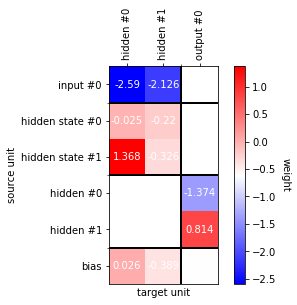

In [63]:
plot_weight_matrix(model_rnn1)

Can you make sense of the weights and what it does? We can make analysis a bit easier by looking the activations of a subset of our data. In the following heatmap, you can see the input values and corresponding target outputs on the y-axis. The actual outputs are in the final column.

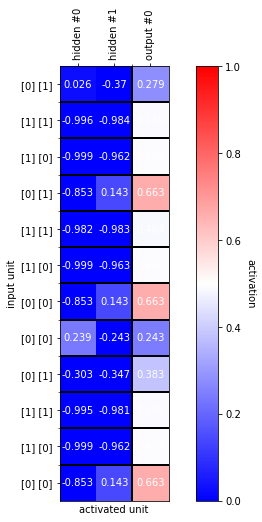

In [64]:
plt.figure(figsize=(10,8))
plot_activation_matrix(model_rnn1, X, y,
                       subset=(0, slice(0, 12), slice(None)),
                       vmin=0, vmax=1)

The `subset` argument allows us to take a subset of our data using the Python `slice` function. We take only the first item of the inputs (`0`), the first 12 time steps (`slice(0, 12)`) and all input/output dimensions (`slice(None)`).

Of every three consecutive time steps, every second output should be correct since that output is the XOR of the current and previous input. We can make seeing this easier by just looking at the output layer activations and only the predictable time steps:

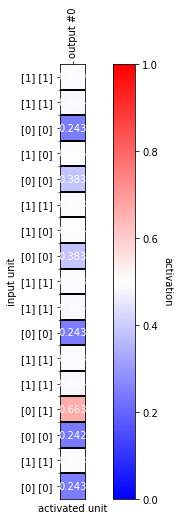

In [65]:
plt.figure(figsize=(10,8))
plot_activation_matrix(model_rnn1, X, y, layers=[model_rnn1.layers[1]],
                       subset=(0, slice(1, 50, 3), slice(None)),
                       vmin=0, vmax=1)

Note that the output is always correct with respect to the target output. This indicates that the network applies XOR on these items. What does the network do with the other two items, which are not predictable?

This network shows that neural networks are able to find structure in data, even though two thirds of the data is unpredictable.

## Exercise 4 

A) Report the connection weights for the SRN after the training. Are they negative or positive?

The connection weights are largely in the range $-2.5$ to $+0.8$. The only weight that is larger than $1$ is the weight between the hidden nodes.

B) How can you see if the network has learned to predict XOR? Explain where you see how well the network is doing. (Hint: read the bottom of page 186-187 in Elman 1990)

Based on Elman's observations, we can know if a model learned to model the XOR problem by checking the activations at the output nodes. The inputs $[0,0]$ and $[1,1]$ would activate one of the outputs whereas the alternated inputs $[0,1]$ and $[1,0]$ would produce activations at the other output node.

Based on the outputs and the activations observed, the network works at separating $[0,1]$ and $[0,0]$ but fails at separating $[1,0]$ from $[1,1]$.

C) How does the network eventually solve the problem? Explain your answer. 

The network, upon training over multiple epochs, would be able to create a representation utilizing the weights learned over training. In this representation, the points $[0,0]$ and $[1,1]$ would be closer to each other than to the points $[0,1]$ and $[1,0]$.

Such a representation can be likened to the effect of folding the vector space. This is achieved by using a deeper layer to extract different features from the data.

# Part 3: Modelling Simple Sentences with Simple Recurrent Neural Networks

The previous tutorial showed that simple RNNs are able to find structure in sequential data, even though the structure is not deterministic. Elman (1990) took this a step further in his final experiment in which he trained a simple RNN on a sequence of generated English sentences. In this tutorial, we make a reproduction of his original network. 

_Elman, J. L. (1990). Finding structure in time. Cognitive science, 14(2), 179-211._

## Data generation

Use the small python program `sentence_generator.py`to generate the training set. This program follows the details that are described by Elman (1990) as closely as possible. (Tip: read the paper!) Just like in the original experiment, we will be using a concatenation of 10,000 random 2-3 word sentences without any sentence boundaries. The 29 unique words are one-hot-encoded (like Elman did!) with two extra bits that are always zero.

In [27]:
from sentence_generator import generate_sentences
from sklearn.preprocessing import LabelBinarizer

In [28]:
sents = generate_sentences(10000)
words = [word for words in sents for word in words]

What do these sentences look like?

In [29]:
sents[:3]

[['boy', 'think'], ['woman', 'move', 'rock'], ['monster', 'eat', 'cookie']]

These seem like decent simple sentences. But remember that the actual data is a concatenation of these sentences:

In [30]:
words[:8]

['boy', 'think', 'woman', 'move', 'rock', 'monster', 'eat', 'cookie']

Now we have to encode the data so that our simple RNN can process it.

In [31]:
all_words = list(set(words)) + ['zog', 'zog2']

# Use one-hot-encoding to assign a unique input unit to each word
encoder = LabelBinarizer()
encoder.fit(all_words)
word_data = encoder.transform(words)

# The first axis will have size 1, just like the previous tutorial
X = word_data[np.newaxis, :]
y = np.append(word_data[1:], word_data[:1], axis=0)[np.newaxis, :]

X.shape, y.shape

((1, 27500, 31), (1, 27500, 31))

`X` and `y` both have the correct shape, so we can now create the network.

## Model definition

Now you will create a network that is very similar to the sequential XOR SRN, but follows the architecture choices of Elman.

In [32]:
# complete code here
model = Sequential([
    SimpleRNN(20,
              input_shape=(None, 31),
              return_sequences=True,
              activation='tanh',
              name='hidden'),
    TimeDistributed(Dense(31, activation='softmax', name='output'))
])

The important differences between the sequential XOR SRN and this network are:
 * Greater number of hidden units (how  many?), which enables the network to learn more complex information.
 * The input shape can be defined as `(None, 31)`. The `None` value indicates that the network works with any number of time steps. Just like the output, the input must be 31-dimensional.
 * We use the `softmax` activation function in the final layer. This is the recommended choice for the output layer if the output is categorical (which it is).
 * The loss function is `categorical_crossentropy` for the same reason as above. In simple terms, categorical crossentropy is better for one-hot-encoded data because it gives more importance to that the target unit activation should be highest. MSE for instance weighs all deviations from zero for the other units equally important, so optimization gets easily stuck at the minimum of only zero outputs.
 * Our network also differs in a number of ways from Elman's because we have some different functions available. However, our results should still be comparable (and informative).

In [33]:
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(lr=0.1, momentum=0.9),
              metrics=['categorical_accuracy', 'mean_squared_error'])

history = model.fit(X, y, epochs=100, verbose=2)

Train on 1 samples
Epoch 1/100
1/1 - 41s - loss: 3.4569 - categorical_accuracy: 0.0359 - mean_squared_error: 0.0313
Epoch 2/100
1/1 - 47s - loss: 3.4434 - categorical_accuracy: 0.0380 - mean_squared_error: 0.0312
Epoch 3/100
1/1 - 46s - loss: 3.4203 - categorical_accuracy: 0.0483 - mean_squared_error: 0.0312
Epoch 4/100
1/1 - 48s - loss: 3.3920 - categorical_accuracy: 0.0674 - mean_squared_error: 0.0311
Epoch 5/100
1/1 - 49s - loss: 3.3614 - categorical_accuracy: 0.0949 - mean_squared_error: 0.0311
Epoch 6/100
1/1 - 48s - loss: 3.3294 - categorical_accuracy: 0.1127 - mean_squared_error: 0.0310
Epoch 7/100
1/1 - 50s - loss: 3.2959 - categorical_accuracy: 0.1131 - mean_squared_error: 0.0309
Epoch 8/100
1/1 - 52s - loss: 3.2607 - categorical_accuracy: 0.1130 - mean_squared_error: 0.0308
Epoch 9/100
1/1 - 49s - loss: 3.2233 - categorical_accuracy: 0.1130 - mean_squared_error: 0.0307
Epoch 10/100
1/1 - 49s - loss: 3.1850 - categorical_accuracy: 0.1130 - mean_squared_error: 0.0306
Epoch 11/1

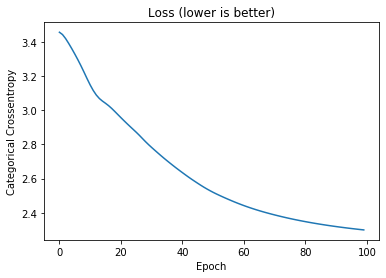

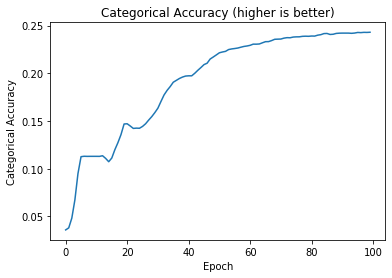

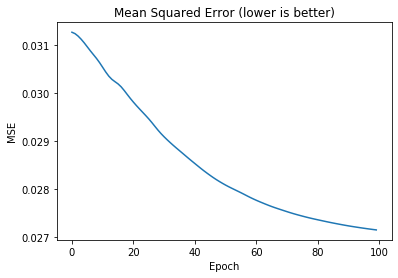

In [34]:
plt.plot(history.history['loss'])
plt.title('Loss (lower is better)')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.title('Categorical Accuracy (higher is better)')
plt.ylabel('Categorical Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.title('Mean Squared Error (lower is better)')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

After 100 epochs, the loss gets nearly stable. The MSE metric for the final epoch is:

In [35]:
history.history['mean_squared_error'][-1] * 31

0.8416352607309818

It appears that our MSE is a bit lower than the score of Elman. Elman did however train only 6 epochs while we trained 100 epochs. (Poor guy! It probably took him days, if not weeks!)

## Exercise 5

 A) What parameters did you use to define the Elman SRN?
 
 The Elman SRN defined had the following structure:
 * Simple Recurrent Unit:
     * Number of hidden units: 20
     * Input shape: None, 31
     * Activation: tanh
 * Time Distributed Dense Unit:
     * Number of outputs: 31
     * Activation: softmax
 * Optimizer:
     * Stochastic Gradient Descent with Momentum
     * Learning Rate: 0.1
     * Momentum: 0.9
 * Loss function: Categorical Cross Entropy

 B) Elman states: "Recall that the prediction task is non-deterministic". Explain why this is so, and why using this network to solve a non-deterministic problem is more interesting than solving a deterministic one.
 
 Deterministic problems would always produce the same outputs for a given particular input. This problem is non-deterministic in the sense the machine could produce different predictions for the third word in a sequence given the first words, due to the many possible underlying grammatical relationships between words. In the context of learning word representations and relationships between words, considering the word sequences to be temporal sequences, thus providing a contextual memory to the network, enhances the learning of word sequences and the underlying relationships.
 
 Learning word sequences as a deterministic task would lead to generating explicit maps (if ABC is a sequence and AB is an input, machine only learns to output C as the next in sequence). Considering it to be a non-deterministic task allows the model to understand deeper relationships between words and form a simple representation of the grammatical and lexical structure of the language
 
For Example:
 If the network is able to relate the action of eating with food related nouns, it also implies the network is able to group such words and form an abstract relationship between the words in a sentence by considering the sentence to be a time dependant series.

 C) Commonly when training and evaluating neural networks, we are concerned about how quickly the loss decreases and how low we can get it to be. But consider: are these useful evaluation metrics for this particular problem? Why or why not? Explain your answer.
 
 The accuracy of our predictions have to be measured by testing the correctness of the prdicted sequence. This could mean syntactic correctness or semantic correctness. An alternative metric would be to compare the predictions against the classes defined in the dataset for correctness.
 
 Loss is not always the best metric to test the performance or the learning that has been achieved by a model.

## Network Analysis

Let's take a look at our network again. With the amount of units in our network, our weight matrix is however not very useful anymore. We can still take a look at some input output combinations in our activation matrix.

/Users/varunravivarma/py3_virtualenv/jupe/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


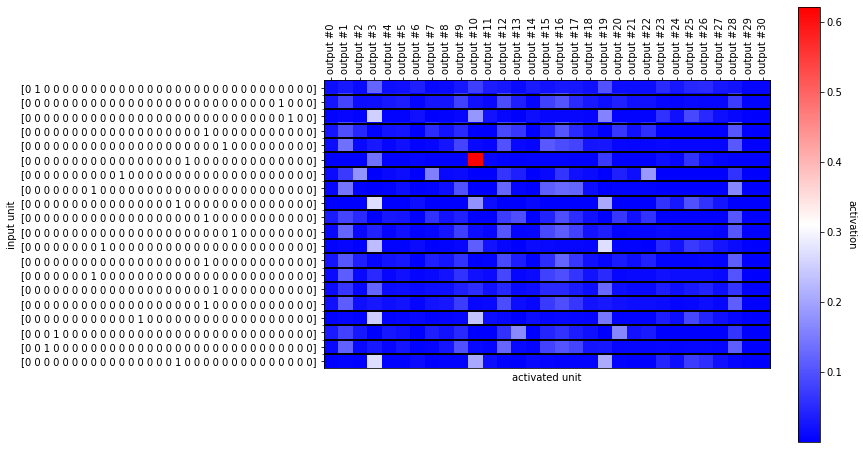

In [36]:
from plot_functions import plot_activation_matrix

plt.figure(figsize=(10,8))
plot_activation_matrix(model, X, layers=[model.layers[1]],
                       subset=(0, slice(0, 20), slice(None)),
                       show_values=False)

We can at least see that the network makes predictions and some words are more easily predictable than others. Elman (1990) created a hierarchical cluster of the mean hidden layer activation values per input word. Elman found that the hidden layer activations of similar words are also similar. Let's reproduce his dendrogram:

In [37]:
from utils import get_activation_matrix

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

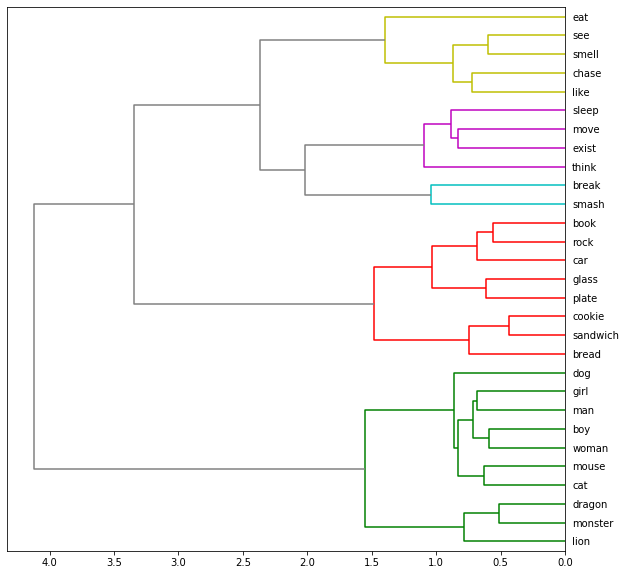

In [38]:
# Use pandas to easily calculate group means for the hidden layer
activations = pd.DataFrame(get_activation_matrix(model, X, layers=[model.layers[0]])[0])
mean_activations = activations.groupby(words).mean()

# Use scipy to create a hierarchical cluster
Z = linkage(mean_activations, method='complete', metric='euclidean', optimal_ordering=True)

plt.figure(figsize=(10,10))
dendrogram(Z,
           labels=mean_activations.index, 
           leaf_rotation=0, 
           orientation='left',
           color_threshold=2.0,
           above_threshold_color='grey')
plt.show()

Clearly, the network did learn lexical categories! If you take a look at the lexicon in `sentence_generator.py`, you can see that the clusters match the lexical categories.

## Exercise 6 (To be answered individually)

 A) Ideally we would want to include several homonyms; use the same representations for both nouns and verbs. How would you modify the `sentence_generator.py` to include several homonyms? Explain what you would do.
 
 The ```sentence_generator.py``` already contains certain homonyms (such as the verb break, which can be used as a transitive verb in multiple contexts, with multiple meanings). Upon adding new homonyms, the structures for the ```lexicons``` and the ```grammar``` would have to be updated to match the possible combinations of lexicons resulting from the addition of homonyms. (Updates can be in the form of adding the homonyms to the correct tags in the lexicon.)
 
Using the same representations could lead to a drop in the accuracy of the model, due to the homonyms having the same encoded value. This could cause the homonyms to be classified erroneously.

 B) In the first lecture 5 advantages for computational modelling were presented (1. Explicitness,2. Study complex predictions or interactions, 3. Inspiration, 4. Practicality and 5. Control and Explanation). Explain how the SRN model of nouns and verbs relates to each one of the advantages. Your answers should not be longer than 400 Words.
 
 1. *Study complex interactions*
     The SRN model is able to utilize context in encoded sequences and genderate a complex grammatical structure from being fed a simple input series. Th emodel enables a study of how linguistic learning has a temporal component and is affected by the contextual component.  
 
 2. *Practicality*
     The effect of treating a task as a temporal task could not be tested easily in humans. Since the learning of a language is not a very conscious task which allows us to analyze the processes involved, it would be easier to simulate an experiment that treated the learning process as temporal and verify hypothesis that are difficult to observe otherwise.
 
 3. *Inspiration*
     The SRN model inspired more complex temporal neural network (such as LSTM's  (*Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation, 9(8), 1735-1780.*). It also furthered research into representations of tasks in the temporal context. Elman also suggests some possible extensions of his work in the paper.
 
 4. *Control and Explanation*
     The definition of the model and the language the model trains on are all constrained by the programmer. This allows for a controlled environment for the simulations.
     In a similar experiment for adults, people could not function like on the simulation due to varying attention spans, low memory quotient, etc. which are extrinsic to the scope of this study.
 
 
 5. *Explicitness*
     The experiment design for the SRN model allows us to control all possible variables in the world. The following constraints are applied to the experiment:
     * Limited lexicon language
     * Restricted grammar
    This constrains the possible outcomes from the experiment to a favorable pool. The model architecture and optimization are also constrained.

 C) Elman (1990) at the end of the paper states “ Some problems change their nature when expressed as temporal events”, and in the paper the main example of this is the modelling of XOR in a simple feed forward network compared to an SRN. In the lab we also modelled word sequences and saw that parts-of-speech like nouns and verbs could emerge from modelling sequences. But this problem was presented as a serial one. Can you speculate on how noun and verb detection could be learned with using a simple feedforward network? What would the input look like and do you think it could solve the problem? What would that then mean?
 
 Part-of-speech tagging can be learnt using a simple neural network by using PoS tagged words as inputs and the word tags as output labels (while training the model). This allows us to only understand the PoS associated with a word, with no clarity on the relationship between sequences of words or contextual input (homonyms that belong to multiple PoS classes). 
 
 Using a simple network with specifically tagged words could generate similar outputs to the RNN, but we would lose a lot of contextual information using a simple network. Context assists in understanding the correct PoS tag for a word more easily compared to explicit labelled datasets.
 
 Hence the SRN is a better choice for the task at hand.

---